## Covariate shift Type - II

Todo, change the name in the file

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams.update({"text.usetex": True,"font.size":17})

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

export_dir = '/home/pgonzalez/Dropbox/quant_datasetshift/'
quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "DyS", "SMM", "SLD","MLPE"]
error = "MAE"
dateexperiment = "2022_07_27_14_42"

results_dict={}
print("Loading results... ",sep="")
for quant_name in quantificators:
    results_dict[quant_name] = pd.read_csv("results/changeprior/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results_dict[quant_name]['p_train'] = results_dict[quant_name]['p_train'].round(2)
    results_dict[quant_name]['p_test'] = results_dict[quant_name]['p_test'].round(2)
    results_dict[quant_name]['prior_measure'] = results_dict[quant_name]['p_test']-results_dict[quant_name]['p_train']
    results_dict[quant_name]['prior_measure'] = results_dict[quant_name]['prior_measure'].round(2)
print("Done")

Loading results... 
Done


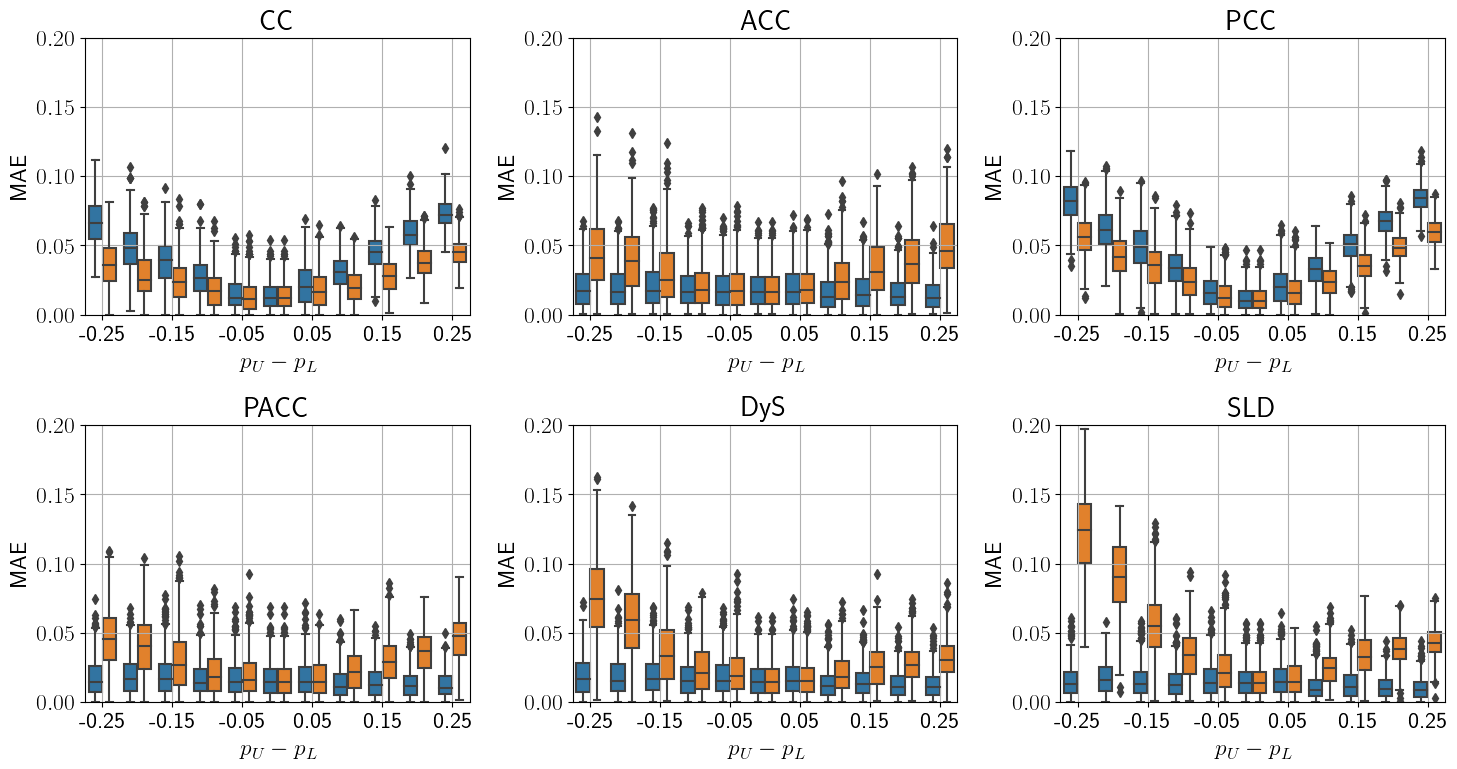

In [2]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

quantificators = ["CC", "ACC", "PCC", "PACC", "DyS", "SLD"]
n_cols=3
fig, ax = plt.subplots(2,n_cols,figsize=(15,8))
pd.set_option('display.max_rows', 500)

for k,quant_name in enumerate(quantificators):
    results = results_dict[quant_name]
    #results = results[results['change_conditionals']==True]
    ax[k//n_cols][k%n_cols].set_ylim(0, 0.2)
    ax[k//n_cols][k%n_cols].set_ylabel(error)
    ax[k//n_cols][k%n_cols].tick_params(axis='x')
    fig.tight_layout()
    sns.boxplot(x='prior_measure',y='error',data=results,hue='change_conditionals',ax=ax[k//n_cols][k%n_cols])
    ax[k//n_cols][k%n_cols].set_xlabel(r"$p_U-p_L$")
    ax[k//n_cols][k%n_cols].set_ylabel("MAE")
    ax[k//n_cols][k%n_cols].xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax[k//n_cols][k%n_cols].set_title("%s"  % (quant_name))
    ax[k//n_cols][k%n_cols].grid()
    ax[k//n_cols][k%n_cols].get_legend().remove()

plt.savefig(os.path.join(export_dir,"images/covariatet2summary.pdf"),format='pdf',bbox_inches='tight')
plt.savefig(os.path.join(export_dir,"images/covariatet2summary.png"),format='png',bbox_inches='tight')
